# 3251-3_EkaterinaPogrebnyakova_Project

Business case: Determine reasons for attrition and why people leave companies. This can be a product
for HR departments at companies.  
https://www.kaggle.com/royklaassebos/ibmhr

## 1. Import Libraries and DataSet

First step, import libraries.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import genfromtxt
import statsmodels.api as sm
from pandas.core import datetools
from decimal import Decimal
import csv
from scipy import stats
import seaborn as sns

from matplotlib import cm
import datetime
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot

C:\Users\Sun\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, metrics     
import warnings
warnings.filterwarnings("ignore")

C:\Users\Sun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#download data
baseDir = "C:/Python_documents/3251_Project/"
#baseDir = "./"
df = pd.read_csv(baseDir + 'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
#check data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. Understanding and Cleaning Data

### Continuous variables

In [6]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Categorical variables

In [7]:
df.describe(exclude = [np.number]).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Age                         1470 non-null int64  - from 18 to 60 - continuous  
Attrition                   1470 non-null object - Yes or No - discrete   
BusinessTravel              1470 non-null object - Non-Travel/Travel_Rarely/Travel_Frequently - discrete  
DailyRate                   1470 non-null int64  - from 102 to 1499 - continuous  
Department                  1470 non-null object - Sales/Research & Development/Human Resources - discrete  
DistanceFromHome            1470 non-null int64  - from 1 to 29  - continuous  
Education                   1470 non-null int64  - from 1 to 5  - continuous  
EducationField              1470 non-null object - Technical Degree/Life Sciences/Medical/Other/Marketing/Human Resources -  
                                                   continuous  
EmployeeCount               1470 non-null int64  - 1 - this column don't provide any useful information and can be deleted   
EmployeeNumber              1470 non-null int64  - just random numbers  
EnvironmentSatisfaction     1470 non-null int64  - from 1 to 4 - (getting through survey to estimate the satisfaction level)  
                                                   continuous  
Gender                      1470 non-null object - Male/Female - discrete  
HourlyRate                  1470 non-null int64  - from 30 to 100 -continuous  
JobInvolvement              1470 non-null int64  - from 1 to 4 - (getting through survey to estimate the involvement level)    
                                                   continuous  
JobLevel                    1470 non-null int64  - from 1 to 5 - discrete  
JobRole                     1470 non-null object - Laboratory Technician/Research Scientist/Manufacturing Director/Healthcare 
                                                   Representative/Sales Representative/Sales Executive/Human Resources/Manager/
                                                   Research Director - discrete  
JobSatisfaction             1470 non-null int64  - from 1 to 4 - (getting through survey to estimate the satisfaction level)  
                                                   continuous  
MaritalStatus               1470 non-null object - Single/Married/Divorced - discrete  
MonthlyIncome               1470 non-null int64  - from 1009 to 19999 - continuous  
MonthlyRate                 1470 non-null int64  - from 2094 to 26999 - continuous  
NumCompaniesWorked          1470 non-null int64  - from o to 9 - continuous  
Over18                      1470 non-null object - all people in the list are over 18 - this column can be deleted  
OverTime                    1470 non-null object - Yes or No - discrete
PercentSalaryHike           1470 non-null int64  - from 11 to 25 - continuous  
PerformanceRating           1470 non-null int64  - from 3 to 4 - (getting through survey to estimate the rating) - continuous   
RelationshipSatisfaction    1470 non-null int64  - from 1 to 4 - (getting through survey to estimate the satisfaction level)  
                                                   continuous  
StandardHours               1470 non-null int64  - 80 - this column can be deleted  
StockOptionLevel            1470 non-null int64  - from 0 to 3 - ???  
TotalWorkingYears           1470 non-null int64  - from 0 to 40 - continuous  
TrainingTimesLastYear       1470 non-null int64  - from 0 to 6 - continuous  
WorkLifeBalance             1470 non-null int64  - from 1 to 4 - (getting through survey to estimate the WLB) - continuous  
YearsAtCompany              1470 non-null int64  - from 0 to 40 - continuous  
YearsInCurrentRole          1470 non-null int64  - from 0 to 18 - continuous  
YearsSinceLastPromotion     1470 non-null int64  - from 0 to 15 - continuous  
YearsWithCurrManager        1470 non-null int64  - from 0 to 17 - continuous  


In [8]:
df = df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis = 1) # delete some columns

In [9]:
# columns with continious data
cont_cols = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [10]:
# columns with all data
cols = ['Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [11]:
# columns with categoricals data
dis_cols = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

## Determine the min, max and mean of Data

In [12]:
df_mean = []
df_min = []
df_max = []
for x in cont_cols:
    mean_ = df[x].mean(axis = 0)
    df_mean.append(mean_)
    min_ = df[x].min(axis = 0)
    df_min.append(min_)
    max_ = df[x].max(axis = 0)
    df_max.append(max_)

In [13]:
df_list = pd.DataFrame(np.column_stack([cont_cols,df_min,df_max,df_mean]), columns = ['Name','Min','Max','Mean'])  
df_list.head()

,Name,Min,Max,Mean
0,Age,18,60,36.923809523809524
1,DailyRate,102,1499,802.4857142857143
2,DistanceFromHome,1,29,9.19251700680272
3,Education,1,5,2.912925170068027
4,EnvironmentSatisfaction,1,4,2.721768707482993


### Dividing the data into quantiles and doing the outlier analysis.


In [14]:
for index, col in df_list.iterrows():
    q1 = df[col[0]].quantile(.25)
    q3 = df[col[0]].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    lof = q1 - (iqr * 3) # lower outer fence
    uof = q3 + (iqr * 3) # upper outer fence
    
        
    if float(df_list['Min'][index]) < lower_bound:
        if float(df_list['Min'][index]) > lof:
            print('Column "' + col[0] + '", mild min outliers')
        if float(df_list['Min'][index]) < lof:
            print('Column "' + col[0] + '", extreme min outliers')
        
    if float(df_list['Max'][index]) > upper_bound:
        if float(df_list['Max'][index]) < uof:
            print('Column "' + col[0] + '", mild max outliers')
        if float(df_list['Max'][index]) > uof:
            print('Column "' + col[0] + '", extreme max outliers')    

Column "MonthlyIncome", mild max outliers
Column "NumCompaniesWorked", mild max outliers
Column "PerformanceRating", extreme max outliers
Column "StockOptionLevel", mild max outliers
Column "TotalWorkingYears", mild max outliers
Column "TrainingTimesLastYear", mild min outliers
Column "YearsAtCompany", extreme max outliers
Column "YearsInCurrentRole", mild max outliers
Column "YearsSinceLastPromotion", extreme max outliers
Column "YearsWithCurrManager", mild max outliers


### Boxplots  - outliers

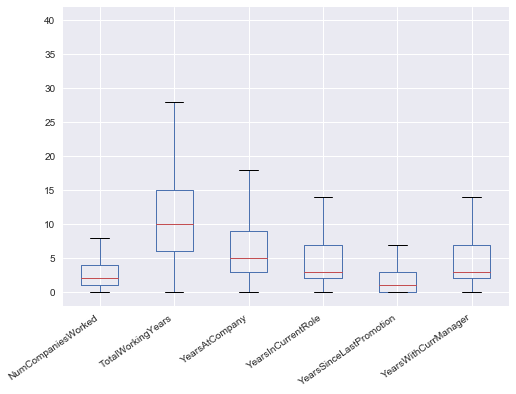

In [15]:
df_box = pd.concat([df['NumCompaniesWorked'],df['TotalWorkingYears'],df['YearsAtCompany'],df['YearsInCurrentRole'],df['YearsSinceLastPromotion'],df['YearsWithCurrManager']],axis = 1, keys = ['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
box_plt = df_box.plot.box()
# rotate labels so they don't overlap
for tick in box_plt.get_xticklabels():
    tick.set_rotation(35)
    tick.set_horizontalalignment('right')

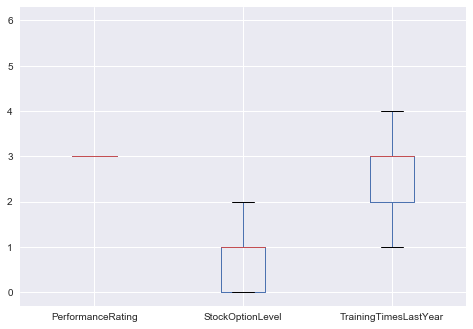

In [16]:
df_box1 = pd.concat([df['PerformanceRating'],df['StockOptionLevel'],df['TrainingTimesLastYear']],axis = 1,keys = ['PerformanceRating','StockOptionLevel','TrainingTimesLastYear'])
df_box1.plot.box()

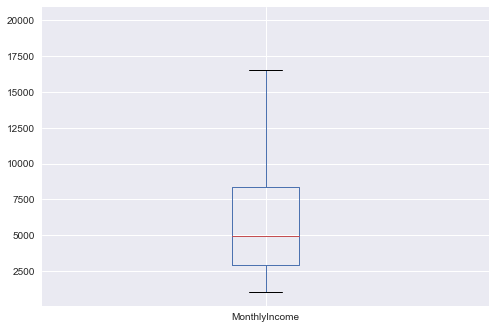

In [17]:
df_box2 = pd.concat([df['MonthlyIncome']], axis=1, keys=['MonthlyIncome'])
df_box2.plot.box()
    

#### Conclusion


The average monthly income for people in this dataset is 6,500, although a few have income between 16,000 and 20,000. The average employee has worked for that company for 5 years. However, 30 employees have been with the company much longer: between 25 and 40 years. 

I will not remove these outliers for two reasons. First, they represent a small proportion of the entire dataset, for both variables. Second, it is normal in many companies that, e.g., the top management has a much higher salary than employees on average, and there are some people who have longer expirience with the company.

## Create Attrition DataSet and Non Attrition DatSet

Only convert the Attrition column into numbers. We'll convert the other columns into dummies later.

In [18]:
df['Attrition'].replace(['Yes','No'],[1,0],inplace=True)

Make additional copy of DataSet before transformayion 

In [19]:
df_new = df.copy()

## 3. Correlation Matrix

Since this data set with many dimensions it is better to know how all the dimensions relate to one another. A simple approach is to look at the correlation matrix: 

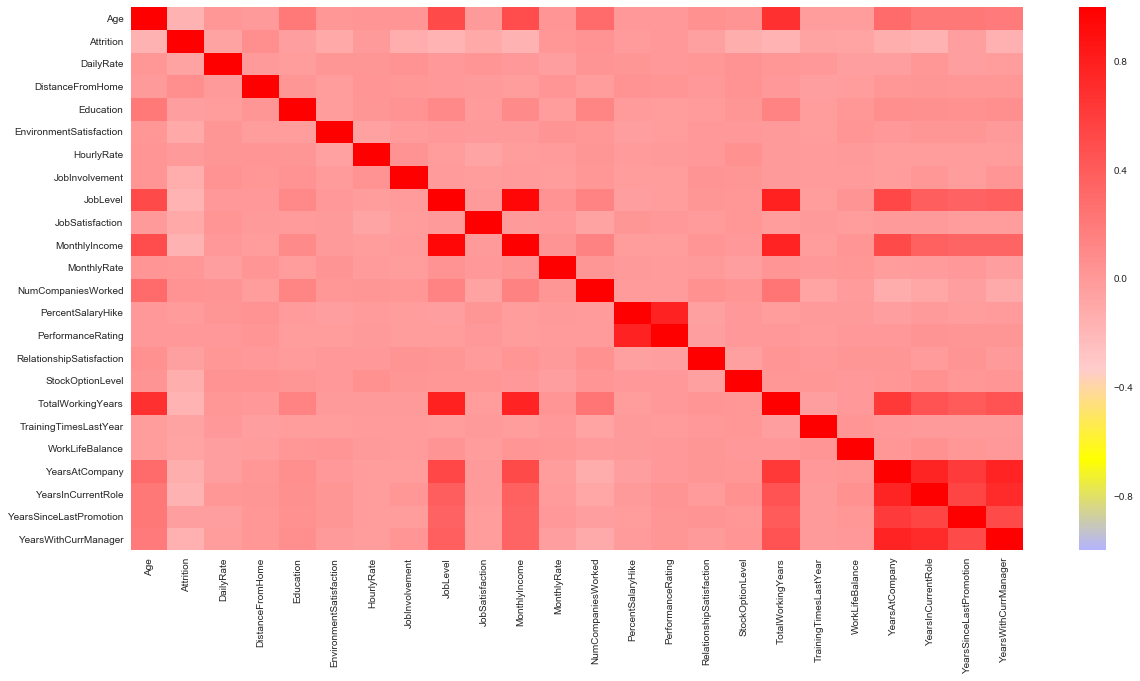

In [25]:
import matplotlib.colors as clrs

ax = plt.figure(figsize = (20,10))
cmap = clrs.LinearSegmentedColormap.from_list('n', ['#b3b3ff', '#ffff00','#ffcccc','#ff9999','#ff6666','#ff3333','#ff0000'])
#ax = sns.heatmap(df.corr())
sns.heatmap(df.corr(), cmap = cmap)

## 4. ANOVA

## 4.1 Check discrete columns /Please check my conclusions

In [26]:
df_new['BusinessTravel'].replace(['Non-Travel','Travel_Rarely','Travel_Frequently'],[1,2,3],inplace=True)
df_new['Department'].replace(['Sales','Research & Development','Human Resources'],[1,2,3],inplace=True)
df_new['EducationField'].replace(['Technical Degree','Life Sciences','Medical','Other','Marketing','Human Resources'],[1,2,3,4,5,6],inplace=True)
df_new['Gender'].replace(['Female','Male'],[1,2],inplace=True)
df_new['MaritalStatus'].replace(['Single','Married','Divorced'],[1,2,3],inplace=True)
df_new['OverTime'].replace(['Yes','No'],[1,2],inplace=True)

### 1. Business Travel

In [27]:
df_freq1 = df_new.loc[df_new.BusinessTravel == 1, ['Attrition']]
df_freq2 = df_new.loc[df_new.BusinessTravel == 2, ['Attrition']]
df_freq3 = df_new.loc[df_new.BusinessTravel == 3, ['Attrition']]
anova = stats.f_oneway(df_freq1, df_freq2, df_freq3)
print(anova)

F_onewayResult(statistic=array([ 12.26835294]), pvalue=array([  5.19983336e-06]))


ANOVA shows that there is a statistically significant difference in means between some pairs of these three groups. Let us check which pairs have statistically significant difference by running t-tests for each pair:

In [28]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_freq1, df_freq2)
print('None-Rarely\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_freq1, df_freq3)
print('None-Frequently\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_freq2, df_freq3)
print('Rarely-Frequent\t' + str(s[0]) + '\t' + str(t[0]))
print("\nAttrition mean for each type of travelers:")
print("No travel:", np.mean(df_freq1['Attrition']))
print("Travel rarely:", np.mean(df_freq2['Attrition']))
print("Travel frequently:", np.mean(df_freq3['Attrition']))

Groups		Statistic	p-value
None-Rarely	-2.29349070571	0.0219932890282
None-Frequently	-4.33753168315	1.8018254937e-05
Rarely-Frequent	-3.93575378568	8.72647875095e-05

Attrition mean for each type of travelers:
No travel: 0.08
Travel rarely: 0.14956855225311602
Travel frequently: 0.2490974729241877


This shows that employees who travel frequently are more likely to leave the company, and this difference is statistically significant as indicated by small p-values in t-tests for the 'None-Frequently' and 'Rarely-Frequently' groups.

Generally, the more a person travels, the more they are likely to leave (see the means).  

### 2. Department

In [29]:
df_dep1 = df_new.loc[df_new.Department == 1, ['Attrition']]
df_dep2 = df_new.loc[df_new.Department == 2, ['Attrition']]
df_dep3 = df_new.loc[df_new.Department == 3, ['Attrition']]
anova_dep = stats.f_oneway(df_dep1, df_dep2, df_dep3)
print(anova_dep)

F_onewayResult(statistic=array([ 5.42684327]), pvalue=array([ 0.00448567]))


ANOVA shows that there is a statistically significant difference in means between some pairs of these three groups.

In [30]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_dep1, df_dep2)
print('Sale-R&D\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_dep1, df_dep3)
print('Sale-HR\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_dep2, df_dep3)
print('R&D-HR\t' + str(s[0]) + '\t' + str(t[0]))

print("\nAttrition mean for each Department:")
print("Sale:", np.mean(df_dep1['Attrition']))
print("Reasearch and Development:", np.mean(df_dep2['Attrition']))
print("Human Resources:", np.mean(df_dep3['Attrition']))

Groups		Statistic	p-value
Sale-R&D	3.24213433154	0.0012142163031
Sale-HR	0.290630532829	0.771452748653
R&D-HR	-1.14820371875	0.251153155319

Attrition mean for each Department:
Sale: 0.2062780269058296
Reasearch and Development: 0.1383975026014568
Human Resources: 0.19047619047619047


This shows that employees from some departments  are more likely to leave the company, and this difference is statistically significant as indicated by small p-values in t-tests for the 'Sale' and 'R&D' departments (p-value < 0.05).

In this case, the people from 'Sale' Department are more likely to leave (see the means).

### 3. Education

In [31]:
df_ed1 = df_new.loc[df_new.Education == 1, ['Attrition']]
df_ed2 = df_new.loc[df_new.Education == 2, ['Attrition']]
df_ed3 = df_new.loc[df_new.Education == 3, ['Attrition']]
df_ed4 = df_new.loc[df_new.Education == 4, ['Attrition']]
df_ed5 = df_new.loc[df_new.Education == 5, ['Attrition']]
anova_ed = stats.f_oneway(df_ed1, df_ed2, df_ed3,df_ed4,df_ed5)
print(anova_ed)

F_onewayResult(statistic=array([ 0.76748134]), pvalue=array([ 0.54637771]))


Not significant

### 4. Education Field

In [32]:
df_edf1 = df_new.loc[df_new.EducationField == 1, ['Attrition']]
df_edf2 = df_new.loc[df_new.EducationField == 2, ['Attrition']]
df_edf3 = df_new.loc[df_new.EducationField == 3, ['Attrition']]
df_edf4 = df_new.loc[df_new.EducationField == 4, ['Attrition']]
df_edf5 = df_new.loc[df_new.EducationField == 5, ['Attrition']]
df_edf6 = df_new.loc[df_new.EducationField == 6, ['Attrition']]
anova_edf = stats.f_oneway(df_edf1, df_edf2, df_edf3,df_edf4,df_edf5,df_edf6)
print(anova_edf)

F_onewayResult(statistic=array([ 3.22703178]), pvalue=array([ 0.00666562]))


ANOVA shows that there is a statistically significant difference in means between some pairs of these three groups since p_value < 0.05.

In [33]:
edf = pd.DataFrame(columns = ['Groups', 'Statistic', 'p-value'])
degrees = ['Technical Degree', 'Life Sciences', 'Medical', 'Other', 'Marketing', 'Human Resources']
s, t = stats.ttest_ind(df_edf1, df_edf2)
edf.loc[len(edf)] = [degrees[0] + '-' + degrees[1], s[0], t[0]]
s, t = stats.ttest_ind(df_edf1, df_edf3)
edf.loc[len(edf)] = [degrees[0] + '-' + degrees[2], s[0], t[0]]
s, t = stats.ttest_ind(df_edf1, df_edf4)
edf.loc[len(edf)] = [degrees[0] + '-' + degrees[3], s[0], t[0]]
s, t = stats.ttest_ind(df_edf1, df_edf5)
edf.loc[len(edf)] = [degrees[0] + '-' + degrees[4], s[0], t[0]]
s, t = stats.ttest_ind(df_edf1, df_edf6)
edf.loc[len(edf)] = [degrees[0] + '-' + degrees[5], s[0], t[0]]
s, t = stats.ttest_ind(df_edf2, df_edf3)
edf.loc[len(edf)] = [degrees[1] + '-' + degrees[2], s[0], t[0]]
s, t = stats.ttest_ind(df_edf2, df_edf4)
edf.loc[len(edf)] = [degrees[1] + '-' + degrees[3], s[0], t[0]]
s, t = stats.ttest_ind(df_edf2, df_edf5)
edf.loc[len(edf)] = [degrees[1] + '-' + degrees[4], s[0], t[0]]
s, t = stats.ttest_ind(df_edf2, df_edf6)
edf.loc[len(edf)] = [degrees[1] + '-' + degrees[5], s[0], t[0]]
s, t = stats.ttest_ind(df_edf3, df_edf4)
edf.loc[len(edf)] = [degrees[2] + '-' + degrees[3], s[0], t[0]]
s, t = stats.ttest_ind(df_edf3, df_edf5)
edf.loc[len(edf)] = [degrees[2] + '-' + degrees[4], s[0], t[0]]
s, t = stats.ttest_ind(df_edf3, df_edf6)
edf.loc[len(edf)] = [degrees[2] + '-' + degrees[5], s[0], t[0]]
s, t = stats.ttest_ind(df_edf4, df_edf5)
edf.loc[len(edf)] = [degrees[3] + '-' + degrees[4], s[0], t[0]]
s, t = stats.ttest_ind(df_edf4, df_edf6)
edf.loc[len(edf)] = [degrees[3] + '-' + degrees[5], s[0], t[0]]
s, t = stats.ttest_ind(df_edf5, df_edf6)
edf.loc[len(edf)] = [degrees[4] + '-' + degrees[5], s[0], t[0]]

edf

,Groups,Statistic,p-value
0,Technical Degree-Life Sciences,2.696722,0.007163
1,Technical Degree-Medical,2.970397,0.003094
2,Technical Degree-Other,1.929522,0.055001
3,Technical Degree-Marketing,0.448434,0.654176
4,Technical Degree-Human Resources,-0.184101,0.854172
5,Life Sciences-Medical,0.514490,0.607016
6,Life Sciences-Other,0.306251,0.759507
7,Life Sciences-Marketing,-2.235364,0.025682
8,Life Sciences-Human Resources,-1.593778,0.111487
9,Medical-Other,0.039668,0.968372


In [34]:
print("\nAttrition mean for each Education Level:")
print("Technical Degree:", np.mean(df_edf1['Attrition']))
print("Life Sciences:", np.mean(df_edf2['Attrition']))
print("Medical:", np.mean(df_edf3['Attrition']))
print("Other:", np.mean(df_edf4['Attrition']))
print("Marketing:", np.mean(df_edf5['Attrition']))
print("Human Resources:", np.mean(df_edf6['Attrition']))


Attrition mean for each Education Level:
Technical Degree: 0.24242424242424243
Life Sciences: 0.14686468646864687
Medical: 0.13577586206896552
Other: 0.13414634146341464
Marketing: 0.22012578616352202
Human Resources: 0.25925925925925924


This shows that employees with particular Education level are more likely to leave the company: Technical Degree - Life Sciences, Technical Degree - Medical, Life Sciences - Marketing, Medical - Marketing; and this difference is statistically significant.  
Compared to people with Life Sciences or Medical education, people with a Technical and Marketing Degree are more likely to leave.

### 5. Gender

In [35]:
df_gen1 = df_new.loc[df_new.Gender == 1, ['Attrition']]
df_gen2 = df_new.loc[df_new.Gender == 2, ['Attrition']]
anova_gen = stats.f_oneway(df_gen1, df_gen2)
print(anova_gen)

F_onewayResult(statistic=array([ 1.27458707]), pvalue=array([ 0.25909236]))


Not significant

### 6. MaritalStatus

In [36]:
df_ms1 = df_new.loc[df_new.MaritalStatus == 1, ['Attrition']]
df_ms2 = df_new.loc[df_new.MaritalStatus == 2, ['Attrition']]
df_ms3 = df_new.loc[df_new.MaritalStatus == 3, ['Attrition']]
anova_ms = stats.f_oneway(df_ms1, df_ms2, df_ms3)
print(anova_ms)

F_onewayResult(statistic=array([ 23.78156547]), pvalue=array([  6.85006756e-11]))


Significant

In [37]:
msdf = pd.DataFrame(columns = ['Groups', 'Statistic', 'p-value'])
status = ['Single', 'Married', 'Divorced']
#print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_ms1, df_ms2)
#print('Single-Married\t' + str(s[0]) + '\t' + str(t[0]))
msdf.loc[len(msdf)] = [status[0] + '-' + status[1], s[0], t[0]]
s, t = stats.ttest_ind(df_ms1, df_ms3)
#print('Single-Divorced\t' + str(s[0]) + '\t' + str(t[0]))
msdf.loc[len(msdf)] = [status[0] + '-' + status[2], s[0], t[0]]
s, t = stats.ttest_ind(df_ms2, df_ms3)
#print('Married-Divorced\t' + str(s[0]) + '\t' + str(t[0]))
msdf.loc[len(msdf)] = [status[1] + '-' + status[2], s[0], t[0]]

msdf

,Groups,Statistic,p-value
0,Single-Married,5.746093,1.170858e-08
1,Single-Divorced,5.541132,4.088145e-08
2,Married-Divorced,1.102499,2.705107e-01


In [38]:
print("\nAttrition mean for each Gender:")
print("Single:", np.mean(df_ms1['Attrition']))
print("Married:", np.mean(df_ms2['Attrition']))
print("Divorced:", np.mean(df_ms3['Attrition']))


Attrition mean for each Gender:
Single: 0.2553191489361702
Married: 0.12481426448736999
Divorced: 0.10091743119266056


This shows that single employees are the most likely to leave the company, followed by married (all else being equal). Divorced employees are the least likely to leave. These differences are statistically significant as indicated by small p-values in t-tests between each of the three groups.

### 7. Over Time

In [39]:
df_ovt1 = df_new.loc[df_new.OverTime == 1, ['Attrition']]
df_ovt2 = df_new.loc[df_new.OverTime == 2, ['Attrition']]
anova_ovt = stats.f_oneway(df_ovt1, df_ovt2)
print(anova_ovt)

F_onewayResult(statistic=array([ 94.65645707]), pvalue=array([  1.00925403e-21]))


In [40]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_ovt1, df_ovt2)
print('Yes-No\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Over Time:")
print("Yes:", np.mean(df_ovt1['Attrition']))
print("No:", np.mean(df_ovt2['Attrition']))

Groups		Statistic	p-value
Yes-No	9.72915500297	1.00925403366e-21

Means for each type of Over Time:
Yes: 0.30528846153846156
No: 0.10436432637571158


This shows that employees who have over time are more likely to leave the company, and this difference is statistically significant.

## 4.2 Check Continuous Data

According the covariance check : Age, EnvironmentSatisfaction, JobEnvolvement, JobLevel, JobSatisfaction, MonthlyIncome, StockOptionalLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager  

### 1. Age

In [41]:
df_new['Age_group'] = pd.cut(df.Age, range(18,70,10), right = False, labels = ['18-27','28-37','38-47','48-57','58 and more'])

In [42]:
df_age1 = df_new.loc[df_new.Age_group == '18-27', ['Attrition']] #1
df_age2 = df_new.loc[df_new.Age_group == '28-37', ['Attrition']] #2
df_age3 = df_new.loc[df_new.Age_group == '38-47', ['Attrition']] #3
df_age4 = df_new.loc[df_new.Age_group == '48-57', ['Attrition']] #4
df_age5 = df_new.loc[df_new.Age_group == '58 and more', ['Attrition']]
anova_age = stats.f_oneway(df_age1, df_age2, df_age3,df_age4, df_age5)
print(anova_age)

F_onewayResult(statistic=array([ 10.20154138]), pvalue=array([  3.79599183e-08]))


Significant

In [43]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_age1, df_age2)
print('18-27-28-37\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age1, df_age3)
print('18-27-38-47\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age1, df_age4)
print('18-27-48-57\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age1, df_age5)
print('18-27-58 and more\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age2, df_age3)
print('28-37-38-47\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age2, df_age4)
print('28-37-48-57\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age2, df_age5)
print('28-37-58 and more\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age3, df_age4)
print('38-47-48-57\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age3, df_age5)
print('38-47-58 and more\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_age4, df_age5)
print('48-57-58 and more\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Age:")
print("18-27:", np.mean(df_age1['Attrition']))
print("28-37:", np.mean(df_age2['Attrition']))
print("38-47:", np.mean(df_age3['Attrition']))
print("48-57:", np.mean(df_age4['Attrition']))
print("58 and more:", np.mean(df_age5['Attrition']))

Groups		Statistic	p-value
18-27-28-37	3.26236046147	0.00114915159052
18-27-38-47	6.22966122139	8.67966320235e-10
18-27-48-57	4.10501628764	4.91447723325e-05
18-27-58 and more	1.23609950465	0.217645269623
28-37-38-47	3.76194574204	0.000177989717004
28-37-48-57	1.93515416598	0.0533136839753
28-37-58 and more	0.0648029732481	0.948350349206
38-47-48-57	-0.901508592152	0.367685201552
38-47-58 and more	-1.3737160099	0.170240625362
48-57-58 and more	-0.827225679958	0.40903061869

Means for each type of Age:
18-27: 0.28095238095238095
28-37: 0.17711598746081506
38-47: 0.09359605911330049
48-57: 0.11764705882352941
58 and more: 0.1724137931034483


There are statistically significant differences in groups 1-2, 1-3, 1-4 and 2-3.  
Generally, a person from 18-27 age group is more likely to leave.

### 2. Distance From Home

In [44]:
df_new['Distance_group'] = pd.cut(df_new.DistanceFromHome, range(1,35,10), right = False, labels = ['1-9','10-19','20 and more'])

In [45]:
df_dis1 = df_new.loc[df_new.Distance_group == '1-9', ['Attrition']] #1
df_dis2 = df_new.loc[df_new.Distance_group == '10-19', ['Attrition']] #2
df_dis3 = df_new.loc[df_new.Distance_group == '20 and more', ['Attrition']] #3
anova_dis = stats.f_oneway(df_dis1, df_dis2, df_dis3)
print(anova_dis)

F_onewayResult(statistic=array([ 5.67720514]), pvalue=array([ 0.00349876]))


Significant

In [46]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_dis1, df_dis2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_dis1, df_dis3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_dis2, df_dis3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Distance from home:")
print("1-9:", np.mean(df_dis1['Attrition']))
print("10-19:", np.mean(df_dis2['Attrition']))
print("20 and more:", np.mean(df_dis3['Attrition']))

Groups		Statistic	p-value
1-2	-2.32235557147	0.0203719845336
1-3	-2.91005118854	0.0036788505975
2-3	-0.530266298413	0.596193595583

Means for each type of Distance from home:
1-9: 0.14035087719298245
10-19: 0.2
20 and more: 0.22058823529411764


There are significant differences in groups 1-2 and 1-3, the means show that employees who live less than 10 (km/mi?) from the office are less likely to leave than those who live further away.

### 3. Environment Satisfaction

In [47]:
df_ens1 = df_new.loc[df_new.EnvironmentSatisfaction == 1, ['Attrition']]
df_ens2 = df_new.loc[df_new.EnvironmentSatisfaction == 2, ['Attrition']]
df_ens3 = df_new.loc[df_new.EnvironmentSatisfaction == 3, ['Attrition']]
df_ens4 = df_new.loc[df_new.EnvironmentSatisfaction == 4, ['Attrition']]
anova_ens = stats.f_oneway(df_ens1, df_ens2, df_ens3,df_ens4)
print(anova_ens)

F_onewayResult(statistic=array([ 7.59718564]), pvalue=array([  4.83688007e-05]))


In [48]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_ens1, df_ens2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ens1, df_ens3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ens1, df_ens4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ens2, df_ens3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ens2, df_ens4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ens3, df_ens4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Environment Satisfaction:")
print("1:", np.mean(df_ens1['Attrition']))
print("2:", np.mean(df_ens2['Attrition']))
print("3:", np.mean(df_ens3['Attrition']))
print("4:", np.mean(df_ens4['Attrition']))

Groups		Statistic	p-value
1-2	3.10988283268	0.00196527801065
1-3	4.03463176761	6.04122619265e-05
1-4	4.11398754211	4.33290448681e-05
2-3	0.491731080573	0.623055683212
2-4	0.580997630744	0.56142113173
3-4	0.10214892276	0.918661299157

Means for each type of Environment Satisfaction:
1: 0.2535211267605634
2: 0.14982578397212543
3: 0.1368653421633554
4: 0.13452914798206278


This shows that employees who gave 1 point of environment satisfaction  are more likely to leave the company, and this difference is statistically significant as indicated by small p-values in t-tests for other.

### 4. Job Involvement

In [49]:
df_jin1 = df_new.loc[df_new.JobInvolvement == 1, ['Attrition']]
df_jin2 = df_new.loc[df_new.JobInvolvement == 2, ['Attrition']]
df_jin3 = df_new.loc[df_new.JobInvolvement == 3, ['Attrition']]
df_jin4 = df_new.loc[df_new.JobInvolvement == 4, ['Attrition']]
anova_jin = stats.f_oneway(df_jin1, df_jin2, df_jin3,df_jin4)
print(anova_jin)

F_onewayResult(statistic=array([ 9.6587055]), pvalue=array([  2.58514663e-06]))


Significant

In [50]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_jin1, df_jin2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jin1, df_jin3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jin1, df_jin4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jin2, df_jin3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jin2, df_jin4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jin3, df_jin4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Job Involvement:")
print("1:", np.mean(df_jin1['Attrition']))
print("2:", np.mean(df_jin2['Attrition']))
print("3:", np.mean(df_jin3['Attrition']))
print("4:", np.mean(df_jin4['Attrition']))

Groups		Statistic	p-value
1-2	2.98667475292	0.00297223628093
1-3	4.62647498301	4.23521767195e-06
1-4	4.87891521076	2.01870343514e-06
2-3	2.01417903946	0.0442061771264
2-4	2.75809050557	0.00601985106683
3-4	1.74094746185	0.0819972967446

Means for each type of Job Involvement:
1: 0.3373493975903614
2: 0.18933333333333333
3: 0.14400921658986174
4: 0.09027777777777778


Groups 1-2, 1-3, 1-4, 2-3, 2-4 have significant differences. Generally, people who feel themselves less involvement are more likely to leave. 

### 5. Job Level

In [51]:
df_jle1 = df_new.loc[df_new.JobLevel == 1, ['Attrition']]
df_jle2 = df_new.loc[df_new.JobLevel == 2, ['Attrition']]
df_jle3 = df_new.loc[df_new.JobLevel == 3, ['Attrition']]
df_jle4 = df_new.loc[df_new.JobLevel == 4, ['Attrition']]
df_jle5 = df_new.loc[df_new.JobLevel == 5, ['Attrition']]
anova_jle = stats.f_oneway(df_jle1, df_jle2, df_jle3,df_jle4,df_jle5)
print(anova_jle)

F_onewayResult(statistic=array([ 19.00844547]), pvalue=array([  2.97515010e-15]))


Significant

In [52]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_jle1, df_jle2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle1, df_jle3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle1, df_jle4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle1, df_jle5)
print('1-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle2, df_jle3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle2, df_jle4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle2, df_jle5)
print('2-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle3, df_jle4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle3, df_jle5)
print('3-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jle4, df_jle5)
print('4-5\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Job Level:")
print("1:", np.mean(df_jle1['Attrition']))
print("2:", np.mean(df_jle2['Attrition']))
print("3:", np.mean(df_jle3['Attrition']))
print("4:", np.mean(df_jle4['Attrition']))
print("5:", np.mean(df_jle5['Attrition']))

Groups		Statistic	p-value
1-2	7.2358308488	8.78454347666e-13
1-3	3.47755198238	0.000534826370788
1-4	4.93513252384	1.02005929204e-06
1-5	3.51753632529	0.000467951854221
2-3	-1.95400386002	0.0510720731934
2-4	1.65872188594	0.0976633389047
2-5	0.664830039153	0.506414224751
3-4	2.66594422983	0.00806461169748
3-5	1.60731164157	0.109093288932
4-5	-0.701442428876	0.483969452067

Means for each type of Job Level:
1: 0.26335174953959484
2: 0.09737827715355805
3: 0.14678899082568808
4: 0.04716981132075472
5: 0.07246376811594203


Groups 1-2, 1-3, 1-4, 1-5 and 3-4 have significant differences. Generally, people who who have low job level (1 and 2) are more likely yo leave.

### 6. Job Satisfaction

In [53]:
df_jsa1 = df_new.loc[df_new.JobSatisfaction == 1, ['Attrition']]
df_jsa2 = df_new.loc[df_new.JobSatisfaction == 2, ['Attrition']]
df_jsa3 = df_new.loc[df_new.JobSatisfaction == 3, ['Attrition']]
df_jsa4 = df_new.loc[df_new.JobSatisfaction == 4, ['Attrition']]
anova_jsa = stats.f_oneway(df_jsa1, df_jsa2, df_jsa3,df_jsa4)
print(anova_jsa)

F_onewayResult(statistic=array([ 5.88927885]), pvalue=array([ 0.00053989]))


Significant

In [54]:
print('Groups\tStatistic\tp-value')
s, t = stats.ttest_ind(df_jsa1, df_jsa2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jsa1, df_jsa3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jsa1, df_jsa4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jsa2, df_jsa3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jsa2, df_jsa4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_jsa3, df_jsa4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Job Satisfaction:")
print("1:", np.mean(df_jsa1['Attrition']))
print("2:", np.mean(df_jsa2['Attrition']))
print("3:", np.mean(df_jsa3['Attrition']))
print("4:", np.mean(df_jsa4['Attrition']))

Groups	Statistic	p-value
1-2	1.92505713727	0.0547221297378
1-3	2.13318847246	0.0332426063264
1-4	4.24934082581	2.41557744911e-05
2-3	-0.0307516201687	0.975476145736
2-4	1.98550598828	0.0474583907998
3-4	2.25549255195	0.0243421534329

Means for each type of Job Satisfaction:
1: 0.22837370242214533
2: 0.16428571428571428
3: 0.16515837104072398
4: 0.11328976034858387


1-3, 2-4, 3-4 significant at 0.05 level (p < 0.05)  
1-4 significant at 0.001 level (p < 0.001)  
Less people satisfy their job more likely they live.

### 7. Monthly Income

In [55]:
df_new['MonthlyIncome_group'] = pd.cut(df_new.MonthlyIncome, range(1009,22999,5000), right = False, labels = ['1009-6008','6009-11008','11009-16008','16009 and more'])

In [56]:
df_min1 = df_new.loc[df_new.MonthlyIncome_group == '1009-6008', ['Attrition']] #1
df_min2 = df_new.loc[df_new.MonthlyIncome_group == '6009-11008', ['Attrition']] #2
df_min3 = df_new.loc[df_new.MonthlyIncome_group == '11009-16008', ['Attrition']] #3
df_min4 = df_new.loc[df_new.MonthlyIncome_group == '16009 and more', ['Attrition']] #4
anova_min = stats.f_oneway(df_min1, df_min2, df_min3,df_min4)
print(anova_min)

F_onewayResult(statistic=array([ 9.52284425]), pvalue=array([  3.13663837e-06]))


Significant

In [57]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_min1, df_min2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_min1, df_min3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_min1, df_min4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_min2, df_min3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_min2, df_min4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_min3, df_min4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Monthly Income:")
print("1:", np.mean(df_min1['Attrition']))
print("2:", np.mean(df_min2['Attrition']))
print("3:", np.mean(df_min3['Attrition']))
print("4:", np.mean(df_min4['Attrition']))

Groups		Statistic	p-value
1-2	2.50808413043	0.0122643577511
1-3	2.72278487463	0.00658596117694
1-4	4.34097806443	1.55726467537e-05
2-3	1.43754199057	0.151294737955
2-4	2.94907350274	0.00334789415155
3-4	1.22454761921	0.222098308728

Means for each type of Monthly Income:
1: 0.19584245076586435
2: 0.1348973607038123
3: 0.07865168539325842
4: 0.03968253968253968


1-2, 1-3, 1-4, 2-4  - significant differences.   
Lower monthly income - more likely attraction.

### 8. Monthly Rate

In [58]:
df_new['MonthlyRate_group'] = pd.cut(df_new.MonthlyRate, range(2094,33000,6000), right = False, labels = ['2000-6999','7000-11999','12000-16999','17000-21999','22000 and more'])

In [59]:
df_mor1 = df_new.loc[df_new.MonthlyRate_group == '2000-6999', ['Attrition']]
df_mor2 = df_new.loc[df_new.MonthlyRate_group == '7000-11999', ['Attrition']]
df_mor3 = df_new.loc[df_new.MonthlyRate_group == '12000-16999', ['Attrition']]
df_mor4 = df_new.loc[df_new.MonthlyRate_group == '17000-21999', ['Attrition']]
df_mor5 = df_new.loc[df_new.MonthlyRate_group == '22000 and more', ['Attrition']]
anova_mor = stats.f_oneway(df_mor1, df_mor2, df_mor3,df_mor4,df_mor5)
print(anova_mor)

F_onewayResult(statistic=array([ 0.37434961]), pvalue=array([ 0.8270568]))


Not significant.

### 9. NumCompaniesWorked 

In [60]:
df_new['NumCompaniesWorked_group'] = pd.cut(df_new.NumCompaniesWorked, range(0,13,4), right = False, labels = ['0-3','4-7','8 and more'])

In [61]:
df_ncw1 = df_new.loc[df_new.NumCompaniesWorked_group == '0-3', ['Attrition']]
df_ncw2 = df_new.loc[df_new.NumCompaniesWorked_group == '4-7', ['Attrition']]
df_ncw3 = df_new.loc[df_new.NumCompaniesWorked_group == '8 and more', ['Attrition']]
anova_ncw = stats.f_oneway(df_ncw1, df_ncw2, df_ncw3)
print(anova_ncw)

F_onewayResult(statistic=array([ 1.73836593]), pvalue=array([ 0.1761694]))


Not significant

### 10. Percent Salary Hike

In [62]:
df_new['PercentSalaryHike_group'] = pd.cut(df_new.PercentSalaryHike, range(11,31,4), right = False, labels = ['11-14','15-18','19-22','23 and more'])

In [63]:
df_psh1 = df_new.loc[df_new.PercentSalaryHike_group == '11-14', ['Attrition']] #1
df_psh2 = df_new.loc[df_new.PercentSalaryHike_group == '15-18', ['Attrition']] #2
df_psh3 = df_new.loc[df_new.PercentSalaryHike_group == '19-22', ['Attrition']] #3
df_psh4 = df_new.loc[df_new.PercentSalaryHike_group == '23 and more', ['Attrition']] #4
anova_psh = stats.f_oneway(df_psh1, df_psh2, df_psh3,df_psh4)
print(anova_psh)

F_onewayResult(statistic=array([ 0.47409305]), pvalue=array([ 0.70036864]))


Not significant

### 11. RelationshipSatisfaction

In [64]:
df_rsa1 = df_new.loc[df_new.RelationshipSatisfaction == 1, ['Attrition']]
df_rsa2 = df_new.loc[df_new.RelationshipSatisfaction == 2, ['Attrition']]
df_rsa3 = df_new.loc[df_new.RelationshipSatisfaction == 3, ['Attrition']]
df_rsa4 = df_new.loc[df_new.RelationshipSatisfaction == 4, ['Attrition']]
anova_rsa = stats.f_oneway(df_rsa1, df_rsa2, df_rsa3, df_rsa4)
print(anova_rsa)

F_onewayResult(statistic=array([ 1.74850285]), pvalue=array([ 0.15518103]))


Not significant

### 12. Stock Optional Level

In [65]:
df_sol1 = df_new.loc[df_new.StockOptionLevel == 0, ['Attrition']]
df_sol2 = df_new.loc[df_new.StockOptionLevel == 1, ['Attrition']]
df_sol3 = df_new.loc[df_new.StockOptionLevel == 2, ['Attrition']]
df_sol4 = df_new.loc[df_new.StockOptionLevel == 3, ['Attrition']]
anova_sol = stats.f_oneway(df_sol1, df_sol2, df_sol3,df_sol4)
print(anova_sol)

F_onewayResult(statistic=array([ 21.01059607]), pvalue=array([  2.50276558e-13]))


In [66]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_sol1, df_sol2)
print('0-1\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_sol1, df_sol3)
print('0-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_sol1, df_sol4)
print('0-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_sol2, df_sol3)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_sol2, df_sol4)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_sol3, df_sol4)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Stock optional Level:")
print("0:", np.mean(df_sol1['Attrition']))
print("1:", np.mean(df_sol2['Attrition']))
print("2:", np.mean(df_sol3['Attrition']))
print("3:", np.mean(df_sol4['Attrition']))

Groups		Statistic	p-value
0-1	7.11375355396	1.91616261749e-12
0-2	4.69481036746	3.14751803408e-06
0-3	1.37743852807	0.168808327491
1-2	0.701954265516	0.482924879671
1-3	-2.33464385569	0.0198526176297
2-3	-2.39611686368	0.0173332025005

Means for each type of Stock optional Level:
0: 0.24405705229793978
1: 0.09395973154362416
2: 0.0759493670886076
3: 0.17647058823529413


The mean of group 0 is significantly different from the mean of groups 1 and 2.  
It means, that less stock optional level - higher possibility to leave.

### 13. Total Working Years

In [67]:
df_new['TotalWorkingYears_group'] = pd.cut(df_new.TotalWorkingYears, range(0,41,10), right = False, labels = ['0-9','10-19','20-29','30 and more'])

In [68]:
df_twy1 = df_new.loc[df_new.TotalWorkingYears_group == '0-9', ['Attrition']] #1
df_twy2 = df_new.loc[df_new.TotalWorkingYears_group == '10-19', ['Attrition']] #2
df_twy3 = df_new.loc[df_new.TotalWorkingYears_group == '20-29', ['Attrition']] #3
df_twy4 = df_new.loc[df_new.TotalWorkingYears_group == '30 and more', ['Attrition']] #4
anova_twy = stats.f_oneway(df_twy1, df_twy2, df_twy3,df_twy4)
print(anova_twy)

F_onewayResult(statistic=array([ 13.12806962]), pvalue=array([  1.84297706e-08]))


Significant

In [69]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_twy1, df_twy2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_twy1, df_twy3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_twy1, df_twy4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_twy2, df_twy3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_twy2, df_twy4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_twy3, df_twy4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Total Working Years:")
print("0-9:", np.mean(df_twy1['Attrition']))
print("10-19:", np.mean(df_twy2['Attrition']))
print("20-29:", np.mean(df_twy3['Attrition']))
print("30 and more:", np.mean(df_twy4['Attrition']))

Groups		Statistic	p-value
1-2	4.40690447746	1.13988361452e-05
1-3	4.60802500636	4.64954299158e-06
1-4	2.71541772484	0.00676753686441
2-3	1.89476903167	0.0585384096377
2-4	1.3267553313	0.185129416247
3-4	0.295533197901	0.767849792243

Means for each type of Total Working Years:
0-9: 0.217753120665742
10-19: 0.12109375
20-29: 0.07065217391304347
30 and more: 0.058823529411764705


0-1, 0-2, 0-3 groups have significant differences. Generally, people who have less than 9 years of expirience more likely decide to leave.

### 14. Training Times Last Year

In [70]:
df_new['TrainingTimesLastYear_group'] = pd.cut(df_new.TrainingTimesLastYear, range(0,9,4), right = False, labels = ['0-3','4 and more'])

In [71]:
df_tra1 = df_new.loc[df_new.TrainingTimesLastYear_group == '0-3', ['Attrition']]
df_tra2 = df_new.loc[df_new.TrainingTimesLastYear_group == '4 and more', ['Attrition']]
anova_tra = stats.f_oneway(df_tra1, df_tra2)
print(anova_tra)

F_onewayResult(statistic=array([ 0.37167532]), pvalue=array([ 0.54218684]))


Not significant

### 15. Work Life Balance

In [72]:
df_wlb1 = df_new.loc[df_new.EnvironmentSatisfaction == 1, ['Attrition']]
df_wlb2 = df_new.loc[df_new.EnvironmentSatisfaction == 2, ['Attrition']]
df_wlb3 = df_new.loc[df_new.EnvironmentSatisfaction == 3, ['Attrition']]
df_wlb4 = df_new.loc[df_new.EnvironmentSatisfaction == 4, ['Attrition']]
anova_wlb = stats.f_oneway(df_wlb1, df_wlb2, df_wlb3,df_wlb4)
print(anova_wlb)

F_onewayResult(statistic=array([ 7.59718564]), pvalue=array([  4.83688007e-05]))


In [73]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_wlb1, df_wlb2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_wlb1, df_wlb3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_wlb1, df_wlb4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_wlb2, df_wlb3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_wlb2, df_wlb4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_wlb3, df_wlb4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Work Life Balance:")
print("1:", np.mean(df_wlb1['Attrition']))
print("2:", np.mean(df_wlb2['Attrition']))
print("3:", np.mean(df_wlb3['Attrition']))
print("4:", np.mean(df_wlb4['Attrition']))

Groups		Statistic	p-value
1-2	3.10988283268	0.00196527801065
1-3	4.03463176761	6.04122619265e-05
1-4	4.11398754211	4.33290448681e-05
2-3	0.491731080573	0.623055683212
2-4	0.580997630744	0.56142113173
3-4	0.10214892276	0.918661299157

Means for each type of Work Life Balance:
1: 0.2535211267605634
2: 0.14982578397212543
3: 0.1368653421633554
4: 0.13452914798206278


The mean of group 1 is significantly different from the mean of groups 2, 3 and 4.
It means, that people with poor work life balance (with rate 1) are more likely to leave.

### 16. Years At Company

In [74]:
df_new['YearsAtCompany_group'] = pd.cut(df_new.YearsAtCompany, range(0,43,6), right = False, labels = ['0-5','6-11','12-17','18-23','24-29','30-35','36 and more'])

In [75]:
df_yac1 = df_new.loc[df_new.YearsAtCompany_group == '0-5', ['Attrition']]
df_yac2 = df_new.loc[df_new.YearsAtCompany_group == '6-11', ['Attrition']]
df_yac3 = df_new.loc[df_new.YearsAtCompany_group == '12-17', ['Attrition']]
df_yac4 = df_new.loc[df_new.YearsAtCompany_group == '18-23', ['Attrition']]
df_yac5 = df_new.loc[df_new.YearsAtCompany_group == '24-29', ['Attrition']]
df_yac6 = df_new.loc[df_new.YearsAtCompany_group == '30-35', ['Attrition']]
df_yac7 = df_new.loc[df_new.YearsAtCompany_group == '36 and more', ['Attrition']]
anova_yac = stats.f_oneway(df_yac1, df_yac2,df_yac3,df_yac4,df_yac5,df_yac6,df_yac7)
print(anova_yac)

F_onewayResult(statistic=array([ 5.41679915]), pvalue=array([  1.50118638e-05]))


Significant

In [76]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_yac1, df_yac2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac1, df_yac3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac1, df_yac4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac1, df_yac5)
print('1-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac1, df_yac6)
print('1-6\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac1, df_yac7)
print('1-7\t' + str(s[0]) + '\t' + str(t[0]))

s, t = stats.ttest_ind(df_yac2, df_yac3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac2, df_yac4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac2, df_yac5)
print('2-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac2, df_yac6)
print('2-6\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac2, df_yac7)
print('2-7\t' + str(s[0]) + '\t' + str(t[0]))

s, t = stats.ttest_ind(df_yac3, df_yac4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac3, df_yac5)
print('3-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac3, df_yac6)
print('3-6\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac3, df_yac7)
print('3-7\t' + str(s[0]) + '\t' + str(t[0]))

s, t = stats.ttest_ind(df_yac4, df_yac5)
print('4-5\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac4, df_yac6)
print('4-6\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac4, df_yac7)
print('4-7\t' + str(s[0]) + '\t' + str(t[0]))

s, t = stats.ttest_ind(df_yac5, df_yac6)
print('5-6\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_yac5, df_yac7)
print('5-7\t' + str(s[0]) + '\t' + str(t[0]))

s, t = stats.ttest_ind(df_yac6, df_yac7)
print('6-7\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each group of Years at Company:")
print("0-5:", np.mean(df_yac1['Attrition']))
print("6-11:", np.mean(df_yac2['Attrition']))
print("12-17:", np.mean(df_yac3['Attrition']))
print("18-23:", np.mean(df_yac4['Attrition']))
print("24-29:", np.mean(df_yac5['Attrition']))
print("30-35:", np.mean(df_yac6['Attrition']))
print("36 and more:", np.mean(df_yac7['Attrition']))

Groups		Statistic	p-value
1-2	4.10959001143	4.22099864338e-05
1-3	3.22566245846	0.00130367808981
1-4	2.95415089599	0.00322117495331
1-5	1.59145393827	0.111906485811
1-6	-0.193247480614	0.84681501645
1-7	-0.202075622182	0.839910432529
2-3	1.33231720615	0.183283749089
2-4	1.20846452615	0.227378669787
2-5	0.819464352337	0.412915112685
2-6	-1.21832036724	0.223687331947
2-7	-0.803795415621	0.421911365538
3-4	-0.0256896931175	0.979533784933
3-5	0.252232149582	0.80131983972
3-6	-1.88097940927	0.0626680615599
3-7	-1.28847375955	0.200584174803
4-5	0.262667012759	0.793358638793
4-6	-1.81492942773	0.0727582736915
4-7	-1.25989176781	0.211197539876
5-6	-1.43750604734	0.161277727367
5-7	-1.20851425577	0.24094469425
6-7	-0.074494225059	0.941601523145

Means for each group of Years at Company:
0-5: 0.20876288659793815
6-11: 0.11875
12-17: 0.07216494845360824
18-23: 0.07317073170731707
24-29: 0.05555555555555555
30-35: 0.23076923076923078
36 and more: 0.25


1-2, 1-3, 1-4 - have significant differences.  
Generally, people who worked less than 5 years in the company more likely decide to leave.

### 17. Years In Current Role

In [77]:
df_new['YearsInCurrentRole_group'] = pd.cut(df_new.YearsInCurrentRole, range(0,21,5), right = False, labels = ['0-4','5-9','10-14','15 and more'])

In [78]:
df_ycr1 = df_new.loc[df_new.YearsInCurrentRole_group == '0-4', ['Attrition']] #1
df_ycr2 = df_new.loc[df_new.YearsInCurrentRole_group == '5-9', ['Attrition']] #2
df_ycr3 = df_new.loc[df_new.YearsInCurrentRole_group == '10-14', ['Attrition']] #3
df_ycr4 = df_new.loc[df_new.YearsInCurrentRole_group == '15 and more', ['Attrition']] #4
anova_ycr = stats.f_oneway(df_ycr1, df_ycr2,df_ycr3,df_ycr4)
print(anova_ycr)

F_onewayResult(statistic=array([ 9.75167162]), pvalue=array([  2.26470828e-06]))


Significant

In [79]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_ycr1, df_ycr2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycr1, df_ycr3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycr1, df_ycr4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycr2, df_ycr3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycr2, df_ycr4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycr3, df_ycr4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Years in Current Role:")
print("0-4:", np.mean(df_ycr1['Attrition']))
print("5-9:", np.mean(df_ycr2['Attrition']))
print("10-14:", np.mean(df_ycr3['Attrition']))
print("15 and more:", np.mean(df_ycr4['Attrition']))

Groups		Statistic	p-value
1-2	4.50326449589	7.26407111234e-06
1-3	3.24495992426	0.00121378566585
1-4	1.1975721328	0.231388441592
2-3	1.32373625251	0.186155990881
2-4	0.131525422301	0.895415958827
3-4	-0.611693677155	0.542062642801

Means for each type of Years in Current Role:
0-4: 0.20065789473684212
5-9: 0.10421286031042129
10-14: 0.05813953488372093
15 and more: 0.09523809523809523


1-2 and 1-3 gave significant difference.  
People who took their position less than 4 years ago are more likely to leave.

### 18. Years Since Last Promotion

In [80]:
df_new['YearsSinceLastPromotion_group'] = pd.cut(df_new.YearsSinceLastPromotion, range(0,16,5), right = False, labels = ['0-4','5-9','10 and more'])

In [81]:
df_lpr1 = df_new.loc[df_new.YearsSinceLastPromotion_group == '0-4', ['Attrition']] #1
df_lpr2 = df_new.loc[df_new.YearsSinceLastPromotion_group == '5-9', ['Attrition']] #2
df_lpr3 = df_new.loc[df_new.YearsSinceLastPromotion_group == '10 and more', ['Attrition']] #3
anova_lpr = stats.f_oneway(df_lpr1, df_lpr2,df_lpr3)
print(anova_lpr)

F_onewayResult(statistic=array([ 0.95211087]), pvalue=array([ 0.386166]))


Not significant

### 19. YearsWithCurrManager

In [82]:
df_new['YearsWithCurrManager_group'] = pd.cut(df_new.YearsWithCurrManager, range(0,21,5), right = False, labels = ['0-4','5-9','10-14','15 and more'])

In [83]:
df_ycm1 = df_new.loc[df_new.YearsWithCurrManager_group == '0-4', ['Attrition']] #1
df_ycm2 = df_new.loc[df_new.YearsWithCurrManager_group == '5-9', ['Attrition']] #2
df_ycm3 = df_new.loc[df_new.YearsWithCurrManager_group == '10-14', ['Attrition']] #3
df_ycm4 = df_new.loc[df_new.YearsWithCurrManager_group == '15 and more', ['Attrition']] #4
anova_ycm = stats.f_oneway(df_ycm1, df_ycm2,df_ycm3,df_ycm4)
print(anova_ycm)

F_onewayResult(statistic=array([ 6.31423976]), pvalue=array([ 0.00029675]))


Sigificant

In [84]:
print('Groups\t\tStatistic\tp-value')
s, t = stats.ttest_ind(df_ycm1, df_ycm2)
print('1-2\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycm1, df_ycm3)
print('1-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycm1, df_ycm4)
print('1-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycm2, df_ycm3)
print('2-3\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycm2, df_ycm4)
print('2-4\t' + str(s[0]) + '\t' + str(t[0]))
s, t = stats.ttest_ind(df_ycm3, df_ycm4)
print('3-4\t' + str(s[0]) + '\t' + str(t[0]))

print("\nMeans for each type of Years with Current Manager:")
print("0-4:", np.mean(df_ycr1['Attrition']))
print("5-9:", np.mean(df_ycr2['Attrition']))
print("10-14:", np.mean(df_ycr3['Attrition']))
print("15 and more:", np.mean(df_ycr4['Attrition']))

Groups		Statistic	p-value
1-2	3.14410642695	0.00170177179854
1-3	2.79729175609	0.00525149807429
1-4	1.81424552626	0.0699603301121
2-3	1.42122471671	0.155838437593
2-4	1.39848627715	0.162642361757
3-4	1.01439637223	0.312891569958

Means for each type of Years with Current Manager:
0-4: 0.20065789473684212
5-9: 0.10421286031042129
10-14: 0.05813953488372093
15 and more: 0.09523809523809523


1-2 and 1-3 have significant diferences. Generally, people who worked with current manager less then 4 years are more likely to leave. It can be connected with all period of working not only because of manager. 

After running ANOVAs the following variables showed statistically significant differences between various groups:
1. Age  
1. Business Travel  
1. Department
1. Distance from home
1. Education Field
1. Environment satisfaction  
1. Job Involvement  
1. Job Level  
1. Job Satisfaction  
1. Marital status  
1. Monthly income  
1. Over Time    
1. Stock option level  
1. Total Working Years  
1. Work life Balance  
1. Years at company  
1. Years in current role  
1. Years with current manager  

## 4.3 Plots

In [85]:
cols_plot = ['Age','BusinessTravel','Department','DistanceFromHome','EducationField', \
       'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus', \
        'MonthlyIncome','OverTime','StockOptionLevel','TotalWorkingYears','WorkLifeBalance', \
        'YearsAtCompany','YearsInCurrentRole', 'YearsWithCurrManager']

In [86]:
att_cols = ['Age','Age_group','Attrition','BusinessTravel','Department','DistanceFromHome','EducationField', \
       'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus', \
        'MonthlyIncome','OverTime','StockOptionLevel','TotalWorkingYears','WorkLifeBalance', \
        'YearsAtCompany','YearsInCurrentRole', 'YearsWithCurrManager', 'Distance_group']             
df_att_new = df_new.loc[df_new.Attrition == 1, att_cols]             

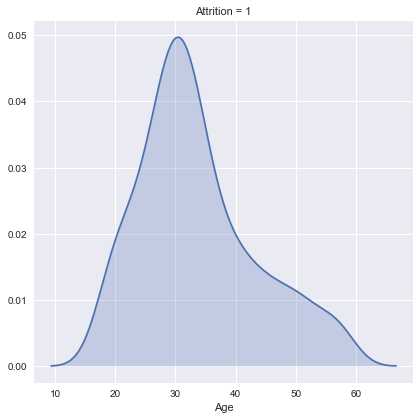

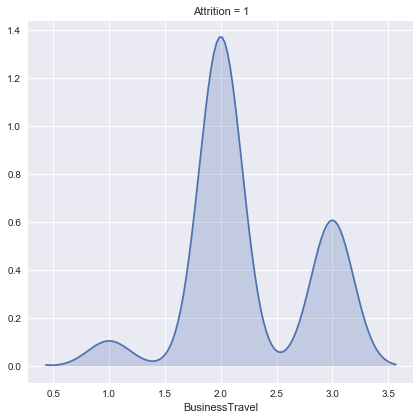

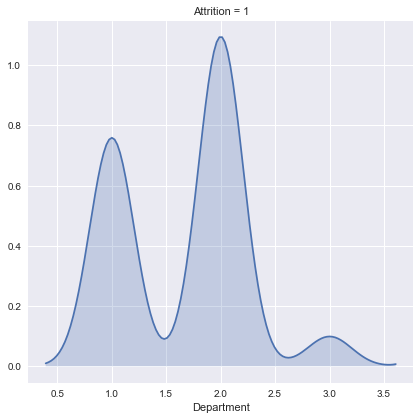

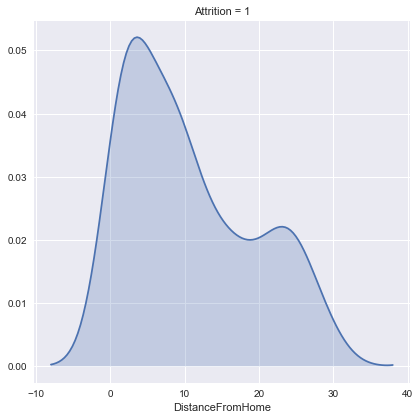

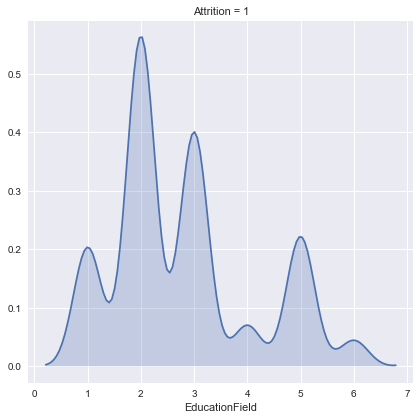

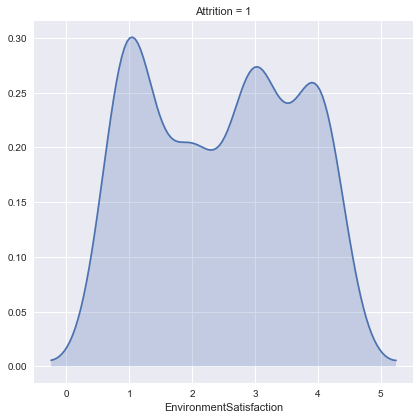

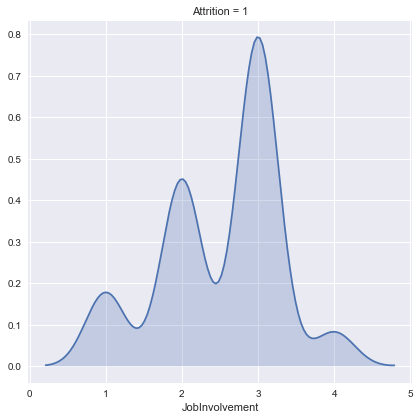

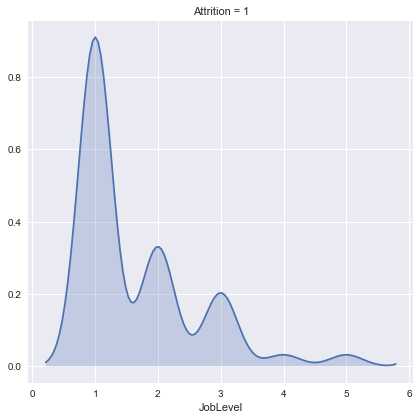

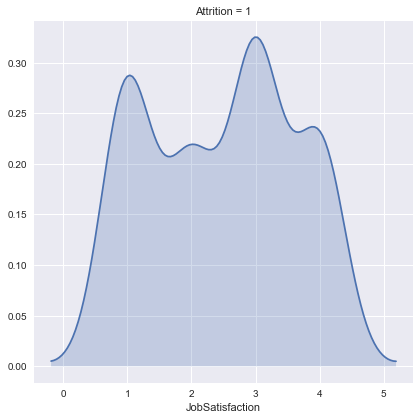

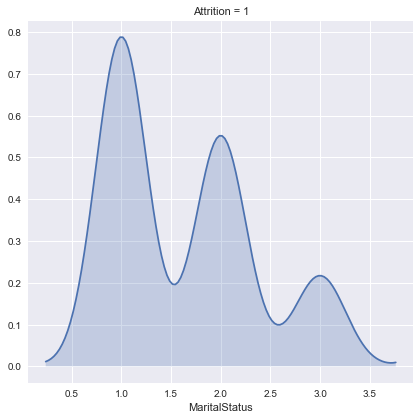

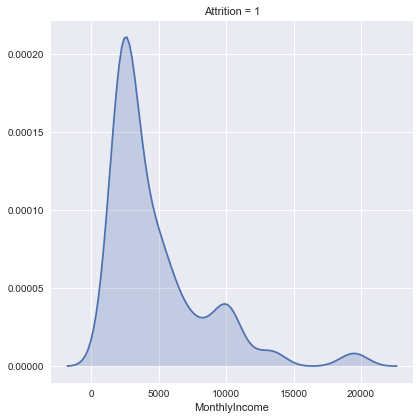

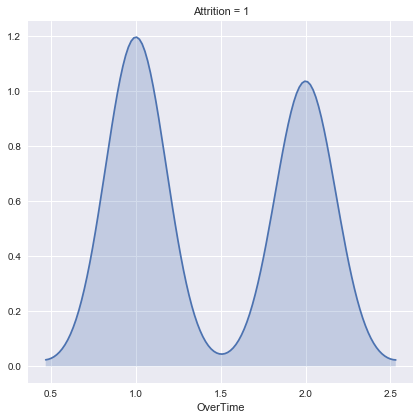

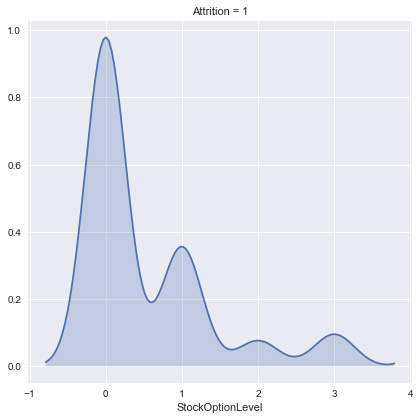

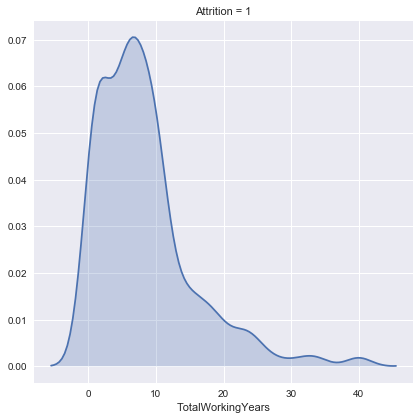

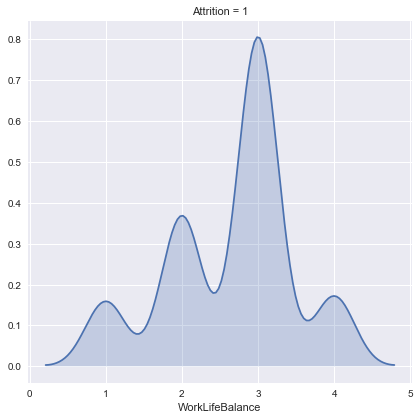

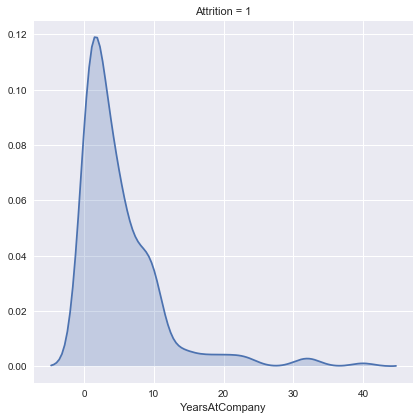

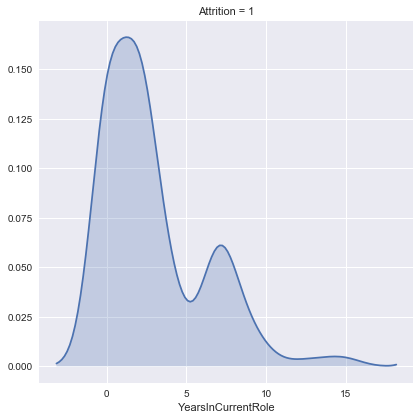

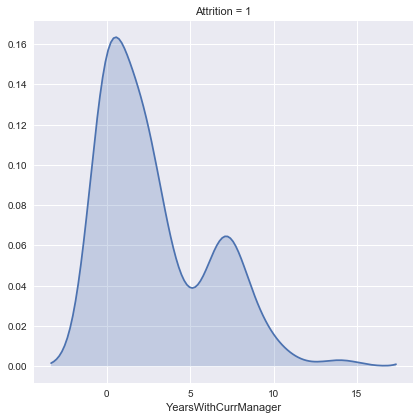

In [87]:
for column in cols_plot:
    g1 = sns.FacetGrid(df_att_new, col="Attrition", size=6)
    # For each subset of values, generate a kernel density plot of the "Attrition" columns.
    g1.map(sns.kdeplot, column, shade=True)


## 4.4 Histogram

In [88]:
df_nonatt_new = df_new.loc[df_new.Attrition == 0, att_cols]

In [89]:
def get_chart_data(column_name):
    """
    Find out % of attrition for each category in the column with the specified column_name
    
    Returns:
    att, non_att -- arrays that contain % of attrition and % of non-attrition for each category in the specified column
    """
    att = []
    non_att = []
    #for i in range(len(set(df_att_new[column_name]))):
    for col in set(df_att_new[column_name]):
        att_value = len(df_att_new[df_att_new[column_name] == col]['Attrition']) / len(df_att_new['Attrition'])
        non_att_value = len(df_nonatt_new[df_nonatt_new[column_name] == col]['Attrition']) / len(df_nonatt_new['Attrition'])
        att.append(att_value)
        non_att.append(non_att_value)
    return att, non_att

## Age

In [90]:
# for each category, find out % of attrition
age_att, age_nonAtt = get_chart_data('Age_group')

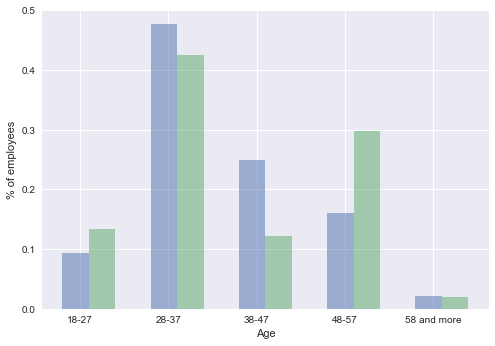

In [91]:
age_cols = ['18-27', '28-37','38-47','48-57','58 and more']
xs = [i + 0.1 for i, _ in enumerate(age_cols)]

p1 = plt.bar(xs,age_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs,age_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Age')
plt.xticks([i for i, _ in enumerate(age_cols)],age_cols)

plt.show()

## Business travel

In [92]:
# for each business travel category, find out % of attrition

travel_att, travel_nonAtt = get_chart_data('BusinessTravel')

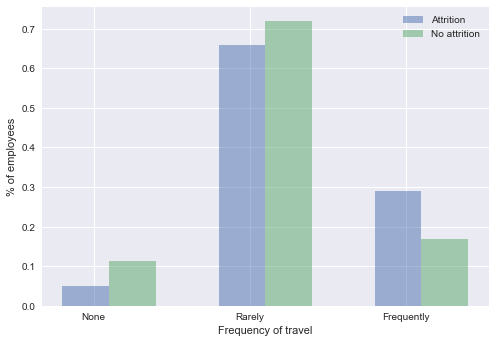

In [93]:
travel_cols = ['None', 'Rarely', 'Frequently']
xs_t = [i + 0.1 for i, _ in enumerate(travel_cols)]

p1 = plt.bar(xs_t,travel_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_t,travel_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Frequency of travel')
plt.xticks([i for i, _ in enumerate(travel_cols)],travel_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])
plt.show()

### Department

In [94]:
dep_att, dep_nonAtt = get_chart_data('Department')

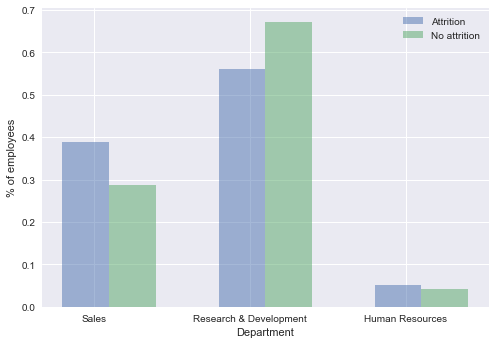

In [95]:
dep_cols = ['Sales','Research & Development','Human Resources']
xs_d = [i + 0.1 for i, _ in enumerate(travel_cols)]

p1 = plt.bar(xs_d,dep_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_d,dep_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Department')
plt.xticks([i for i, _ in enumerate(dep_cols)],dep_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])
plt.show()

### Distance From Home

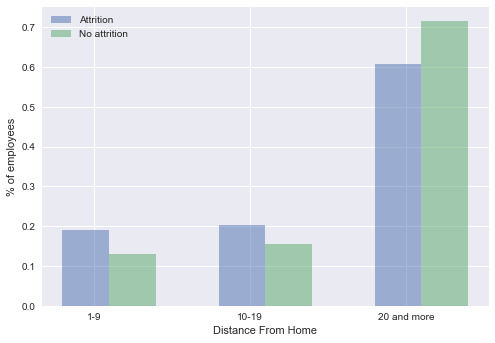

In [96]:
dist_att, dist_nonAtt = get_chart_data('Distance_group')
dist_cols = ['1-9','10-19','20 and more']
xs_di = [i + 0.1 for i, _ in enumerate(dist_cols)]

p1 = plt.bar(xs_di,dist_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_di,dist_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Distance From Home')
plt.xticks([i for i, _ in enumerate(dist_cols)],dist_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])
plt.show()

### Education Field

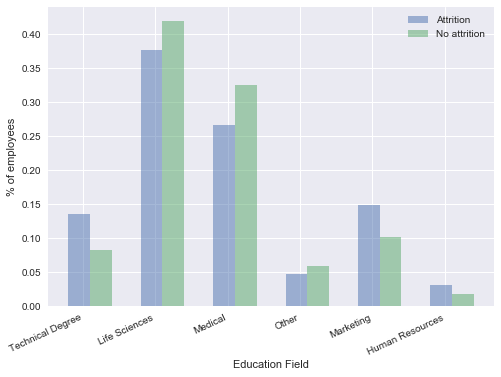

In [97]:
edu_att, edu_nonAtt = get_chart_data('EducationField')
dist_cols = ['Technical Degree', 'Life Sciences', 'Medical', 'Other', 'Marketing', 'Human Resources']
xs_ed = [i + 0.1 for i, _ in enumerate(dist_cols)]

p1 = plt.bar(xs_ed,edu_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_ed,edu_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Education Field')
plt.xticks([i for i, _ in enumerate(dist_cols)],dist_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(25)
    tick.set_horizontalalignment('right')
plt.show()

### Environment satisfaction

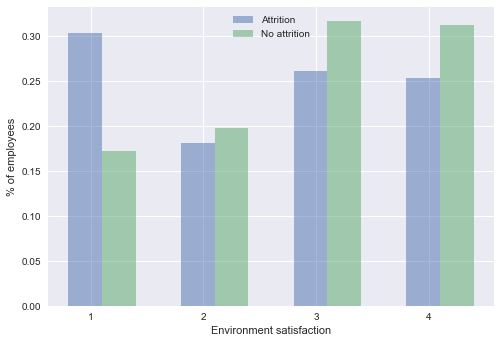

In [98]:
env_att, env_nonAtt = get_chart_data('EnvironmentSatisfaction')
dist_cols = ['1','2','3','4']
xs_e = [i + 0.1 for i, _ in enumerate(dist_cols)]

p1 = plt.bar(xs_e,env_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_e,env_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Environment satisfaction')
plt.xticks([i for i, _ in enumerate(dist_cols)],dist_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])
plt.show()

### Job Involvement

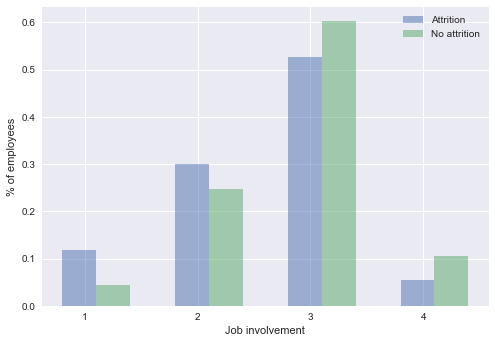

In [99]:
joi_att, joi_nonAtt = get_chart_data('JobInvolvement')
dist_cols = ['1','2','3','4']
xs_joi = [i + 0.1 for i, _ in enumerate(dist_cols)]

p1 = plt.bar(xs_joi,joi_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_joi,joi_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Job involvement')
plt.xticks([i for i, _ in enumerate(dist_cols)],dist_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])
plt.show()

### Job Level

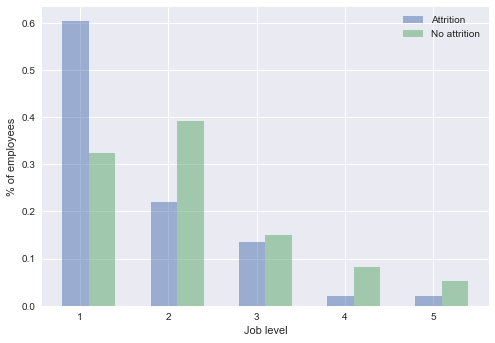

In [100]:
jol_att, jol_nonAtt = get_chart_data('JobLevel')
dist_cols = ['1','2','3','4','5']
xs_jol = [i + 0.1 for i, _ in enumerate(dist_cols)]

p1 = plt.bar(xs_jol,jol_att, alpha = 0.5, width = -0.3, align = 'edge')
p2 = plt.bar(xs_jol,jol_nonAtt, alpha = 0.5, width = 0.3, align = 'edge')

plt.ylabel('% of employees')
plt.xlabel('Job level')
plt.xticks([i for i, _ in enumerate(dist_cols)],dist_cols)
plt.legend([p1, p2], ['Attrition', 'No attrition'])
plt.show()

## 5 Dummy Variable

In [101]:
df1 = df.copy() # copy data set for future transformation
# replace spaces in some categorical columns with _
df1['BusinessTravel'].replace(['Non-Travel'],['Non_Travel'],inplace=True)
df1['Department'].replace(['Research & Development'],['Research_Development'],inplace=True)
cols = ['Department', 'EducationField', 'JobRole']
for col in cols:
    df1[col].replace(' ', '_', inplace = True, regex = True)

# create dummy variables for categorical variables, removing one of the dummies in each (as # of dummies = (# of categories - 1))
travelDummy = pd.get_dummies(df1['BusinessTravel'], prefix = 'BusinessTravel', drop_first = True)
departmentDummy = pd.get_dummies(df1['Department'], prefix = 'Department', drop_first = True)
educationDummy = pd.get_dummies(df1['EducationField'], prefix = 'Education', drop_first = True)
genderDummy = pd.get_dummies(df1['Gender'], prefix = 'Gender', drop_first = True)
jobRoleDummy = pd.get_dummies(df1['JobRole'], prefix = 'JobRole', drop_first = True)
maritalDummy = pd.get_dummies(df1['MaritalStatus'], prefix = 'MaritalStatus', drop_first = True)
overtimeDummy = pd.get_dummies(df1['OverTime'], prefix = 'OverTime', drop_first = True)
# merge it with the dataset
df1 = pd.concat([df1, travelDummy, departmentDummy, educationDummy, genderDummy, jobRoleDummy, maritalDummy, overtimeDummy], axis = 1)
# remove the original BusinessTravel
df1.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime'], inplace = True, axis = 1)
# see what came out of it
df1.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2


## 6. Logistic Regression

### 6.1 All columns

In [103]:
logistic_cols1 = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime_Yes','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Research_Development','Department_Sales','Education_Life_Sciences','Education_Marketing','Education_Medical','Education_Other','Education_Technical_Degree','Gender_Male','JobRole_Human_Resources','JobRole_Laboratory_Technician','JobRole_Manager','JobRole_Manufacturing_Director','JobRole_Research_Director','JobRole_Research_Scientist','JobRole_Sales_Executive','JobRole_Sales_Representative','MaritalStatus_Married','MaritalStatus_Single']

In [104]:
logistic_cols = ['Age', 'JobLevel','DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate', 'JobInvolvement', \
         'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', \
         'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', \
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', \
         'BusinessTravel_Travel_Rarely', 'Department_Research_Development', 'Department_Sales', 'Education_Life_Sciences', \
         'Education_Marketing', 'Education_Medical', 'Education_Other', 'Education_Technical_Degree', 'Gender_Male', \
         'JobRole_Human_Resources', 'JobRole_Laboratory_Technician', 'JobRole_Manager', 'JobRole_Manufacturing_Director', \
         'JobRole_Research_Director', 'JobRole_Research_Scientist', 'JobRole_Sales_Executive', 'JobRole_Sales_Representative', \
         'MaritalStatus_Married', 'MaritalStatus_Single','OverTime_Yes']

In [105]:
from sklearn import linear_model
from statsmodels.discrete.discrete_model import Logit

X1 = df1[logistic_cols1]
y1 = df1['Attrition']
# fit the model - sklearn
"""
model = linear_model.LogisticRegression()
model.fit(X, y)
"""
# fit the model - statsmodels
model = Logit(y1, X1)
res = model.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.292242
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1426
Method:                           MLE   Df Model:                           43
Date:                Sun, 10 Dec 2017   Pseudo R-squ.:                  0.3384
Time:                        20:14:49   Log-Likelihood:                -429.60
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 3.912e-67
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0312      0.014     -2.30

### **Comments:**
1. The Pseudo-R<sup>2</sup> is now 0.34. The interpretation of  Pseudo-R<sup>2</sup> is not as clear-cut as in linear regression.
1. Looking at the P>|z| column, some variables aren't significant. Only 18 are significant at the 0.05 level (the level usually used)
1. Interpretation of dummy variables: their coefficients are interpreted in relation to the dummy that was dropped. Example Gender, where we dropped Female. A positive (and significant) coefficient for Male indicates that compared to ladies, gents are more likely to leave.

### 6.2 Backward elimination (start with the model that includes all potential variables)

Delete columns: Education = 0.3384, monthly income = 0.3384, Hourly Rate = 0.3383, PerformanceRating = 0.3383, EducationTechnicalDegree = 0.3382, JobLevel = 0.3382, Monthly Rate = 0.3381, JobRole_Manufacturing_Director = 0.3380, JobRole_Manager = 0.3379, PercentSalaryHike = 0.3377, JobRole_Sales_Executive = 0.3367, MaritalStatus_Married = 0.3357, JobRole_Research_Scientist = 0.3345, Education_Marketing = 0.3333, DailyRate = 0.3322, JobRole_Research_Director = 0.3298, StockOptionLevel = 0.3274, Education_Other = 0.3247

In [106]:
logistic_cols2 = ['Age','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction', 'NumCompaniesWorked','OverTime_Yes','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Research_Development','Department_Sales','Education_Life_Sciences','Education_Medical','Gender_Male','JobRole_Human_Resources','JobRole_Laboratory_Technician','JobRole_Sales_Representative','MaritalStatus_Single']

In [107]:
from sklearn import linear_model
from statsmodels.discrete.discrete_model import Logit

X2 = df1[logistic_cols2]#only continues
y2 = df1['Attrition']
model = Logit(y2, X2)
res = model.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.298281
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                           25
Date:                Sun, 10 Dec 2017   Pseudo R-squ.:                  0.3247
Time:                        20:14:49   Log-Likelihood:                -438.47
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 1.137e-73
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0317      0.013     -2.39

Pseudo-R<sup>2</sup> bigger when there are all variables, after deleting those which p(z-test) > 0.05 Pseudo-R<sup>2</sup> decreased from 0.3384 to 0.3247

### 6.3 Significant columns from p-value 

In [108]:
logistic_cols3 = ['Age','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction', 'OverTime_Yes','StockOptionLevel','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Research_Development','Department_Sales','Education_Life_Sciences','Education_Medical','MaritalStatus_Single']
X3 = df1[logistic_cols3]#only continues
y3 = df1['Attrition']
model = Logit(y3, X3)
res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.328975
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                           19
Date:                Sun, 10 Dec 2017   Pseudo R-squ.:                  0.2552
Time:                        20:14:50   Log-Likelihood:                -483.59
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 7.052e-59
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0053      0.011     -0.46

All columns that are significant in Anova and p-value - in the result Pseudo-R<sup>2</sup> = 0.2552 smaller than prvevious one

### 6.4 p-value and Pseudo-R<sup>2</sup>

In [110]:
logistic_cols4 = ['Age','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','StockOptionLevel', 'NumCompaniesWorked','OverTime_Yes','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Research_Development','Department_Sales','Education_Life_Sciences','Education_Medical','JobRole_Human_Resources','Gender_Male','JobRole_Laboratory_Technician','JobRole_Sales_Representative','MaritalStatus_Single']
X4 = df1[logistic_cols4]#only continues
y4 = df1['Attrition']
model = Logit(y4, X4)
res = model.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.296530
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           28
Date:                Sun, 10 Dec 2017   Pseudo R-squ.:                  0.3287
Time:                        20:15:19   Log-Likelihood:                -435.90
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 6.871e-73
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0317      0.013     -2.39

In this case we combine columns from Pseudo-R<sup>2</sup> and p-value and get Pseudo-R<sup>2</sup> 0.3287

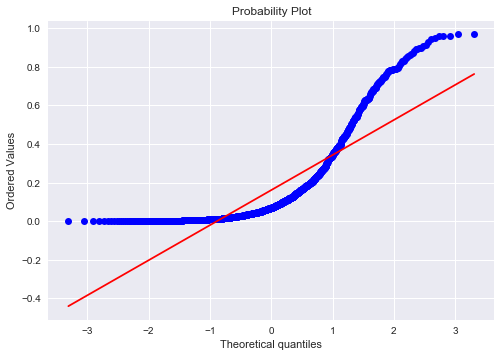

In [111]:
# normal probability plot
from scipy import stats
predictions = res.predict()
p = stats.probplot(predictions, plot = plt)
plt.show()

## 7. Plots and Prediction

In [112]:
import random

#### Predicted probabilities vs. true values

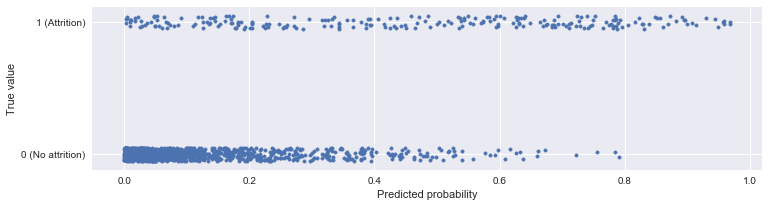

In [124]:
pert = np.random.uniform(low = -0.05, high = 0.05, size = (len(predictions),))
# plot
plt.figure(figsize = (12, 3))
plt.scatter(predictions, y2 + pert, marker = '.')
plt.ylabel('True value')
plt.xlabel('Predicted probability')
plt.yticks([0, 1], ['0 (No attrition)', '1 (Attrition)'])
plt.show()

#### Empirical estimate of probability

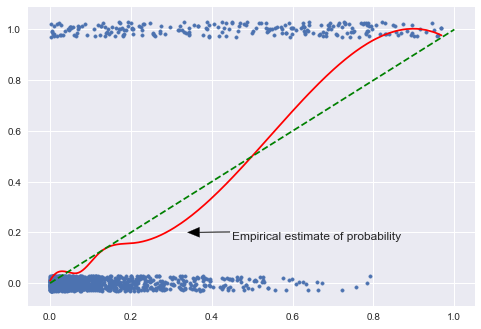

In [125]:
import scipy.interpolate as inter

# perturb y's
pert = np.random.uniform(low = -0.03, high = 0.03, size = (len(predictions),))

# sort predicted values
preds = pd.DataFrame({'Predictions': predictions, 'TrueValues': y2})
preds.sort_values(by = 'Predictions', inplace = True)

# generate splines
splines = inter.UnivariateSpline(preds.Predictions, preds.TrueValues, s = 121)
# draw predicted values
plt.scatter(preds.Predictions, preds.TrueValues + pert, marker = '.')
# empirical estimate of probability
plt.plot(preds.Predictions, splines(preds.Predictions), 'r-')
# straight line
plt.plot([0, 1], [0, 1], color = 'g', linestyle = '--')
#plt.annotate('What can be expected of a\nreasonable logistic model', xy = (0.38, 0.4), xytext = (0.1, 0.6), arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 10))
plt.annotate('Empirical estimate of probability', xy = (0.34, 0.2), xytext = (0.45, 0.17), arrowprops = dict(facecolor = 'black', width = 0.5, headwidth = 10))
plt.show()

#### Split the dataset into 70% train, 30% test

In [126]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size = 0.3)

#### Create a model on the training data

In [127]:
from sklearn import linear_model

X = train[logistic_cols2]
y = train['Attrition']

# fit the model with sklearn
model = linear_model.LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Calculate predictions on the test data

In [128]:
# calculate predictions
X_test = test[logistic_cols2]
y_test = test['Attrition']
preds = model.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# calculate accuracy
acc = accuracy_score(y_test, preds)
print("Accuracy:", acc)

# calculate precision
pr = precision_score(y_test, preds, average = None)

# calculate recall
re = recall_score(y_test, preds, average = None)

# display metrics
metrics = pd.DataFrame({'Precision': pr, 'Recall': re, ' ': ['No attrition', 'Attrition']})
metrics = metrics.set_index(' ')
metrics

Accuracy: 0.886621315193


,Precision,Recall
,,
No attrition,0.894207,0.977961
Attrition,0.818182,0.461538


#### Conclusions

* The accuracy is relatively high, but that is because the classes are skewed (there are many more people with Attrition == 0 than Attrition == 1)
* The precision score is relatively high for both classes, so classifications from the model are highly likely to be correct
* The recall score is very high for 'No attrition' and low for 'Attrition'. Therefore given an instance of attrition, the model is not highly likely to predict it. However, given an example of non-attrition, the model is very likely to predict it.